In [85]:
# Import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

data = pd.read_csv('Airbnb Listings Bangkok.csv')
data.head()


,Unnamed: 0,id,name,host_id,host_name,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365,number_of_reviews_ltm
0,0,27934,Nice room with superb city view,120437,Nuttee,Ratchathewi,13.75983,100.54134,Entire home/apt,1905,3,65,2020-01-06,0.50,2,353,0
1,1,27979,"Easy going landlord,easy place",120541,Emy,Bang Na,13.66818,100.61674,Private room,1316,1,0,NaN,NaN,2,358,0
2,2,28745,modern-style apartment in Bangkok,123784,Familyroom,Bang Kapi,13.75232,100.62402,Private room,800,60,0,NaN,NaN,1,365,0
3,3,35780,Spacious one bedroom at The Kris Condo Bldg. 3,153730,Sirilak,Din Daeng,13.78823,100.57256,Private room,1286,7,2,2022-04-01,0.03,1,323,1
4,4,941865,Suite Room 3 at MetroPoint,610315,Kasem,Bang Kapi,13.76872,100.63338,Private room,1905,1,0,NaN,NaN,3,365,0


Struktur Dataset

Dataset dari file Airbnb diatas terdiri dari kolom-kolom berikut:

1. id: Identitas unik dari setiap listing.
2. name: Nama dari listing.
3. host_id: Identitas unik dari host.
4. host_name: Nama dari host.
5. neighbourhood: Nama daerah atau lingkungan tempat listing berada.
6. latitude: Koordinat geografis lintang.
7. longitude: Koordinat geografis bujur.
8. room_type: Jenis kamar yang ditawarkan (Entire home/apt, Private room, Shared room).
9. price: Harga harian dalam mata uang lokal.
10. minimum_nights: Jumlah malam minimum untuk penyewaan.
11.number_of_reviews: Jumlah ulasan yang diterima listing.
12. last_review: Tanggal ulasan terakhir.
13. reviews_per_month: Rata-rata ulasan per bulan.
14. calculated_host_listings_count: Jumlah listing yang dimiliki host di wilayah tersebut.
15. availability_365: Ketersediaan listing selama 365 hari ke depan.
16. number_of_reviews_ltm: Jumlah ulasan dalam 12 bulan terakhir.

Masalah yang dapat terjadi dengan Airbnb Bangkok adalah
- Missing Values: Beberapa kolom mungkin memiliki nilai yang hilang (missing values). Misalnya, kolom last_review dan reviews_per_month memiliki beberapa nilai NaN.

- Outliers: Harga harian (price) dapat memiliki nilai yang sangat tinggi atau sangat rendah, yang dapat mempengaruhi analisis statistik.

- Duplicated Data: Ada kemungkinan adanya duplikasi data yang perlu diidentifikasi dan dihapus.

- Inconsistent Data: Data mungkin memiliki inkonsistensi dalam pengisian, misalnya, dalam nama neighbourhood atau jenis room_type.

- Data Up-to-Date: Informasi seperti ketersediaan listing (availability_365) dan ulasan terbaru (last_review) perlu diperbarui secara berkala agar tetap relevan.

Currency Issues: Harga (price) yang mungkin menggunakan simbol $ bisa menyebabkan kebingungan terkait mata uang yang sebenarnya digunakan.

Geographic Accuracy: Koordinat geografis (latitude dan longitude) harus tepat untuk analisis yang akurat terkait lokasi.

In [86]:
#Data Understanding
# 1. Check untuk missing values
missing_values = data.isnull().sum()

# 2. Descriptive statistics
descriptive_stats = data.describe()

# 3. Unique values di kolom kategorikal
unique_values = {
    "room_type": data["room_type"].unique(),
    "neighbourhood": data["neighbourhood"].unique(),
}

# Display the results
missing_values, descriptive_stats, unique_values

(Unnamed: 0                           0
 id                                   0
 name                                 8
 host_id                              0
 host_name                            1
 neighbourhood                        0
 latitude                             0
 longitude                            0
 room_type                            0
 price                                0
 minimum_nights                       0
 number_of_reviews                    0
 last_review                       5790
 reviews_per_month                 5790
 calculated_host_listings_count       0
 availability_365                     0
 number_of_reviews_ltm                0
 dtype: int64,
          Unnamed: 0            id       host_id      latitude     longitude  \
 count  15854.000000  1.585400e+04  1.585400e+04  15854.000000  15854.000000   
 mean    7926.500000  1.579397e+17  1.541058e+08     13.745144    100.559903   
 std     4576.799919  2.946015e+17  1.318726e+08      0.043040   

In [87]:
# persentase missing value di tiap kolom
df.isna().sum()/df.shape[0]*100

Unnamed: 0                         0.000000
id                                 0.000000
name                               0.050460
host_id                            0.000000
host_name                          0.006308
neighbourhood                      0.000000
latitude                           0.000000
longitude                          0.000000
room_type                          0.000000
price                              0.000000
minimum_nights                     0.000000
number_of_reviews                  0.000000
last_review                       36.520752
reviews_per_month                 36.520752
calculated_host_listings_count     0.000000
availability_365                   0.000000
number_of_reviews_ltm              0.000000
dtype: float64

<Axes: >

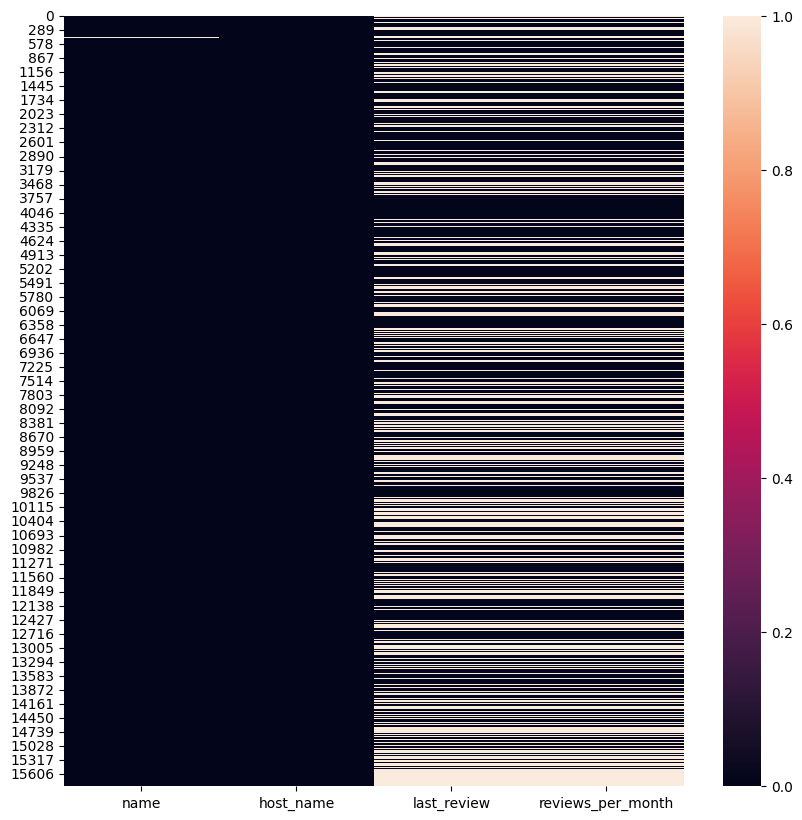

In [88]:
# Sebaran missing value di dalam data
plt.figure(figsize=(10,10))
sns.heatmap(df[['name','host_name','last_review','reviews_per_month']].isna())

Secara garis besar:  

Missing Values:
1. Kolom name memiliki 8 nilai yang hilang.
2. Kolom last_review dan reviews_per_month memiliki 5790 nilai yang hilang.

Descriptive Statistics:
1. Dataset memiliki 15,854 baris.
2. Rata-rata harga per malam adalah 3,217.70 dalam mata uang lokal, dengan harga maksimum mencapai 1,100,000.
3. Rata-rata minimum jumlah malam adalah 15, dengan maksimum 1,125 malam.
4. Rata-rata jumlah reviews adalah 16.65, dengan jumlah ulasan maksimum 1,224.
5. Rata-rata listing availability selama 365 hari adalah 244 hari.
6. Rata-rata jumlah review dalam 12 bulan terakhir adalah 3.48, dengan maksimum 325 review.

In [89]:
# Mengisi nilai yang hilang dengan df.loc
data.loc[data['name'].isnull(), 'name'] = 'No Name'
data.loc[data['last_review'].isnull(), 'last_review'] = '2022-01-01'
data.loc[data['reviews_per_month'].isnull(), 'reviews_per_month'] = 0

In [90]:
# Menghapus duplikasi berdasarkan kolom 'id'
data.drop_duplicates(subset='id', keep='first', inplace=True)

In [91]:
# Mengubah kolom 'last_review' menjadi tipe datetime
data['last_review'] = pd.to_datetime(data['last_review'])

In [92]:
# Menangani outliers pada beberapa kolom
data = data[(data['price'] > 0) & (data['price'] < data['price'].quantile(0.99))]
data = data[(data['minimum_nights'] > 0) & (data['minimum_nights'] < data['minimum_nights'].quantile(0.99))]
data = data[(data['number_of_reviews'] >= 0) & (data['number_of_reviews'] < data['number_of_reviews'].quantile(0.99))]

In [93]:
# Menampilkan informasi hasil cleaning
print(data.info())
print(data.describe())

<class 'pandas.core.frame.DataFrame'>
Index: 15371 entries, 0 to 15853
Data columns (total 17 columns):
 #   Column                          Non-Null Count  Dtype         
---  ------                          --------------  -----         
 0   Unnamed: 0                      15371 non-null  int64         
 1   id                              15371 non-null  int64         
 2   name                            15371 non-null  object        
 3   host_id                         15371 non-null  int64         
 4   host_name                       15370 non-null  object        
 5   neighbourhood                   15371 non-null  object        
 6   latitude                        15371 non-null  float64       
 7   longitude                       15371 non-null  float64       
 8   room_type                       15371 non-null  object        
 9   price                           15371 non-null  int64         
 10  minimum_nights                  15371 non-null  int64         
 11  number_

In [94]:
# Menampilkan data dalam bentuk tabel
print(data.head(10))  # Menampilkan 10 baris pertama

   Unnamed: 0       id                                            name  \
0           0    27934                 Nice room with superb city view   
1           1    27979                  Easy going landlord,easy place   
2           2    28745               modern-style apartment in Bangkok   
3           3    35780  Spacious one bedroom at The Kris Condo Bldg. 3   
4           4   941865                      Suite Room 3 at MetroPoint   
5           5  1704776                  NEw Pro!!  Bungalow Bkk Centre   
6           6    48736                 Condo with Chaopraya River View   
7           7  1738669                 1 chic bedroom apartment in BKK   
8           8  1744248              Batcave, Pool view, near Chatuchak   
9           9   952677                   Standard Room Decor do Hostel   

   host_id   host_name  neighbourhood  latitude  longitude        room_type  \
0   120437      Nuttee    Ratchathewi  13.75983  100.54134  Entire home/apt   
1   120541         Emy     

Mengisi Missing Values kolom yang akan di analisa :
1. name
2. last_review
3. reviews_per_month

In [95]:
# Mengisi nilai yang hilang pada kolom 'name' dengan 'No Name'
data.loc[data['name'].isnull(), 'name'] = 'No Name'

# Menampilkan jumlah nilai yang hilang setelah pengisian
missing_values_name = data['name'].isnull().sum()
print(f"Jumlah nilai hilang pada kolom 'name' setelah pengisian: {missing_values_name}")

Jumlah nilai hilang pada kolom 'name' setelah pengisian: 0


In [96]:
# Mengisi nilai yang hilang pada kolom 'last_review' dengan tanggal '2022-01-01'
data.loc[data['last_review'].isnull(), 'last_review'] = '2022-01-01'

# Menampilkan jumlah nilai yang hilang setelah pengisian
missing_values_last_review = data['last_review'].isnull().sum()
print(f"Jumlah nilai hilang pada kolom 'last_review' setelah pengisian: {missing_values_last_review}")


Jumlah nilai hilang pada kolom 'last_review' setelah pengisian: 0


In [97]:
# Mengisi nilai yang hilang pada kolom 'reviews_per_month' dengan 0
data.loc[data['reviews_per_month'].isnull(), 'reviews_per_month'] = 0

# Menampilkan jumlah nilai yang hilang setelah pengisian
missing_values_reviews_per_month = data['reviews_per_month'].isnull().sum()
print(f"Jumlah nilai hilang pada kolom 'reviews_per_month' setelah pengisian: {missing_values_reviews_per_month}")

Jumlah nilai hilang pada kolom 'reviews_per_month' setelah pengisian: 0


3. Mengubah Tipe Data (Data Formatting)
Kolom yang akan ditangani: last_review


In [98]:
# Mengubah kolom 'last_review' menjadi tipe datetime
data['last_review'] = pd.to_datetime(data['last_review'])

# Menampilkan tipe data setelah perubahan
print(data.dtypes)

Unnamed: 0                                 int64
id                                         int64
name                                      object
host_id                                    int64
host_name                                 object
neighbourhood                             object
latitude                                 float64
longitude                                float64
room_type                                 object
price                                      int64
minimum_nights                             int64
number_of_reviews                          int64
last_review                       datetime64[ns]
reviews_per_month                        float64
calculated_host_listings_count             int64
availability_365                           int64
number_of_reviews_ltm                      int64
dtype: object


4. Menangani Outliers. Kolom yang akan dianalisa:
- price
- minimum_nights
- number_of_reviews

In [99]:
# Menangani outliers pada kolom 'price'
initial_row_count = data.shape[0]
data = data[(data['price'] > 0) & (data['price'] < data['price'].quantile(0.99))]
final_row_count = data.shape[0]

# Menampilkan jumlah baris sebelum dan sesudah penghapusan outliers pada 'price'
print(f"Jumlah baris sebelum penghapusan outliers pada 'price': {initial_row_count}")
print(f"Jumlah baris setelah penghapusan outliers pada 'price': {final_row_count}")

Jumlah baris sebelum penghapusan outliers pada 'price': 15371
Jumlah baris setelah penghapusan outliers pada 'price': 15217


In [100]:
# Menangani outliers pada kolom 'minimum_nights'
initial_row_count = data.shape[0]
data = data[(data['minimum_nights'] > 0) & (data['minimum_nights'] < data['minimum_nights'].quantile(0.99))]
final_row_count = data.shape[0]

# Menampilkan jumlah baris sebelum dan sesudah penghapusan outliers pada 'minimum_nights'
print(f"Jumlah baris sebelum penghapusan outliers pada 'minimum_nights': {initial_row_count}")
print(f"Jumlah baris setelah penghapusan outliers pada 'minimum_nights': {final_row_count}")


Jumlah baris sebelum penghapusan outliers pada 'minimum_nights': 15217
Jumlah baris setelah penghapusan outliers pada 'minimum_nights': 15006


In [58]:
# Menangani outliers pada kolom 'number_of_reviews'
initial_row_count = data.shape[0]
data = data[(data['number_of_reviews'] >= 0) & (data['number_of_reviews'] < data['number_of_reviews'].quantile(0.99))]
final_row_count = data.shape[0]

# Menampilkan jumlah baris sebelum dan sesudah penghapusan outliers pada 'number_of_reviews'
print(f"Jumlah baris sebelum penghapusan outliers pada 'number_of_reviews': {initial_row_count}")
print(f"Jumlah baris setelah penghapusan outliers pada 'number_of_reviews': {final_row_count}")


Jumlah baris sebelum penghapusan outliers pada 'number_of_reviews': 15006
Jumlah baris setelah penghapusan outliers pada 'number_of_reviews': 14849


In [84]:
# Menampilkan informasi hasil cleaning
print(data.info())
print(data.describe())

<class 'pandas.core.frame.DataFrame'>
Index: 14849 entries, 0 to 15853
Data columns (total 17 columns):
 #   Column                          Non-Null Count  Dtype         
---  ------                          --------------  -----         
 0   Unnamed: 0                      14849 non-null  int64         
 1   id                              14849 non-null  int64         
 2   name                            14849 non-null  object        
 3   host_id                         14849 non-null  int64         
 4   host_name                       14848 non-null  object        
 5   neighbourhood                   14849 non-null  object        
 6   latitude                        14849 non-null  float64       
 7   longitude                       14849 non-null  float64       
 8   room_type                       14849 non-null  object        
 9   price                           14849 non-null  int64         
 10  minimum_nights                  14849 non-null  int64         
 11  number_

Visualisasi Airbnb Listing Bangkok

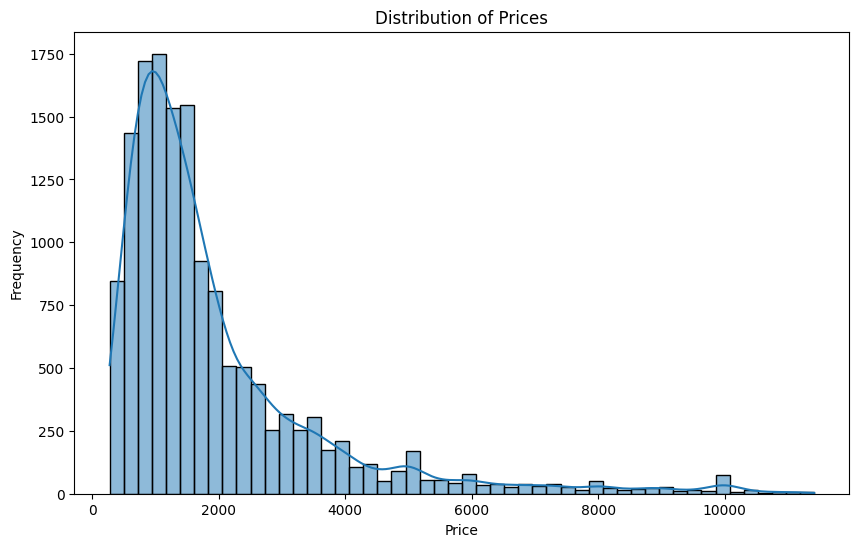

In [60]:
# 1. Price Distribution
plt.figure(figsize=(10, 6))
sns.histplot(data['price'], bins=50, kde=True)
plt.title('Distribution of Prices')
plt.xlabel('Price')
plt.ylabel('Frequency')
plt.show()

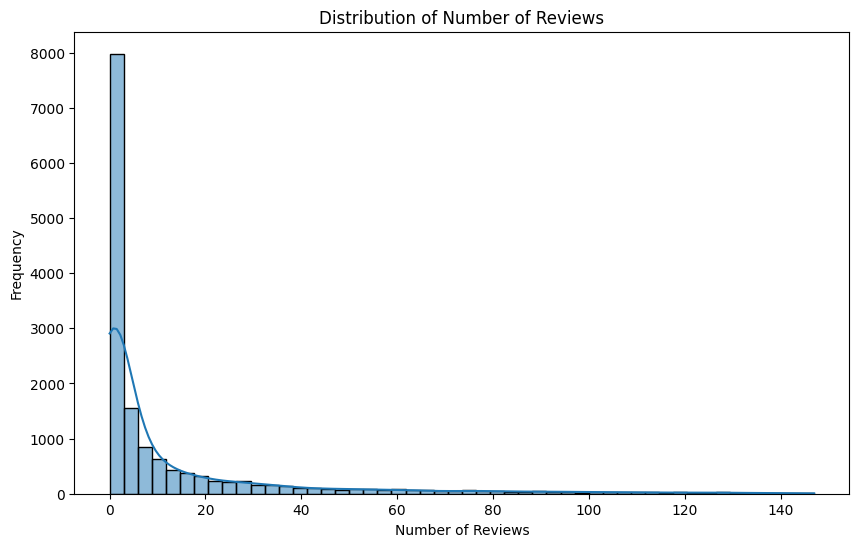

In [61]:
# 2. Number of Reviews Distribution
plt.figure(figsize=(10, 6))
sns.histplot(data['number_of_reviews'], bins=50, kde=True)
plt.title('Distribution of Number of Reviews')
plt.xlabel('Number of Reviews')
plt.ylabel('Frequency')
plt.show()

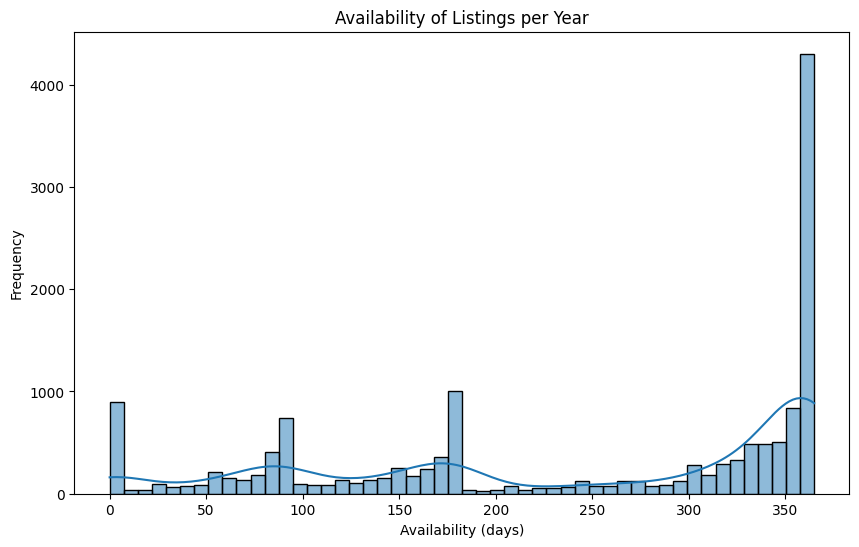

In [62]:
# 3. Listing Availability per Year
plt.figure(figsize=(10, 6))
sns.histplot(data['availability_365'], bins=50, kde=True)
plt.title('Availability of Listings per Year')
plt.xlabel('Availability (days)')
plt.ylabel('Frequency')
plt.show()

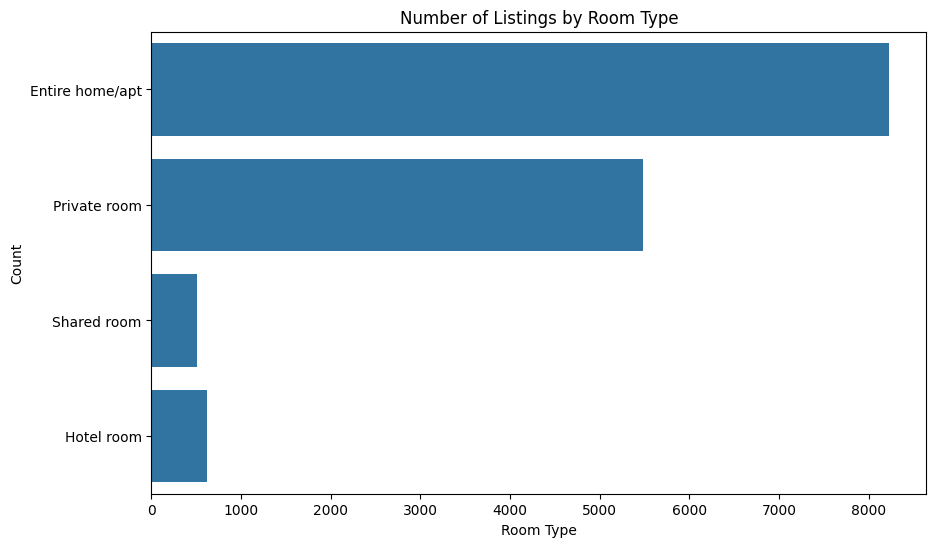

In [63]:
# 4. Number of Listings by Room Type
plt.figure(figsize=(10, 6))
sns.countplot(data['room_type'])
plt.title('Number of Listings by Room Type')
plt.xlabel('Room Type')
plt.ylabel('Count')
plt.show()

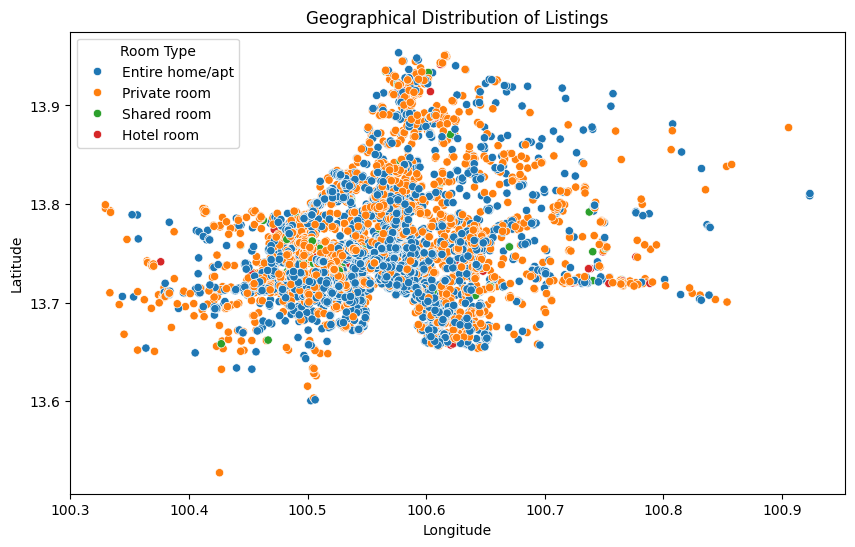

In [64]:
# 5. Geographical Distribution of Listings
plt.figure(figsize=(10, 6))
sns.scatterplot(x='longitude', y='latitude', hue='room_type', data=data)
plt.title('Geographical Distribution of Listings')
plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.legend(title='Room Type')
plt.show()

Statistika Deskriptif

In [65]:
# Menampilkan statistik deskriptif dasar 
descriptive_stats = data.describe()
print(descriptive_stats)

         Unnamed: 0            id       host_id      latitude     longitude  \
count  14849.000000  1.484900e+04  1.484900e+04  14849.000000  14849.000000   
mean    8095.495118  1.646726e+17  1.570087e+08     13.745461    100.559928   
min        0.000000  2.793400e+04  5.892000e+04     13.527300    100.329550   
25%     4216.000000  2.195211e+07  4.159889e+07     13.720120    100.529650   
50%     8142.000000  3.571942e+07  1.253274e+08     13.738840    100.561450   
75%    12047.000000  5.342808e+07  2.407327e+08     13.759600    100.585300   
max    15853.000000  7.907510e+17  4.926659e+08     13.953540    100.923440   
std     4543.736733  2.990291e+17  1.321527e+08      0.043229      0.051393   

              price  minimum_nights  number_of_reviews  \
count  14849.000000    14849.000000       14849.000000   
mean    1943.434911        8.582059          12.615395   
min      278.000000        1.000000           0.000000   
25%      900.000000        1.000000           0.000000  

In [66]:
import numpy as np

# Statistik Deskriptif untuk kolom 'price'
mean_price = data['price'].mean()
median_price = data['price'].median()
mode_price = data['price'].mode()[0]
std_price = data['price'].std()
range_price = data['price'].max() - data['price'].min()
iqr_price = data['price'].quantile(0.75) - data['price'].quantile(0.25)
variance_price = data['price'].var()
skewness_price = data['price'].skew()
kurtosis_price = data['price'].kurtosis()

# Menampilkan statistik deskriptif
descriptive_stats_price = {
    'Mean': mean_price,
    'Median': median_price,
    'Mode': mode_price,
    'Standard Deviation': std_price,
    'Range': range_price,
    'IQR': iqr_price,
    'Variance': variance_price,
    'Skewness': skewness_price,
    'Kurtosis': kurtosis_price
}

print("Statistik Deskriptif untuk Kolom 'Price':")
for stat, value in descriptive_stats_price.items():
    print(f"{stat}: {value:.2f}")

Statistik Deskriptif untuk Kolom 'Price':
Mean: 1943.43
Median: 1400.00
Mode: 1500.00
Standard Deviation: 1701.11
Range: 11136.00
IQR: 1407.00
Variance: 2893786.70
Skewness: 2.43
Kurtosis: 7.03


In [67]:
# Statistik Deskriptif untuk kolom 'minimum_nights'
mean_minimum_nights = data['minimum_nights'].mean()
median_minimum_nights = data['minimum_nights'].median()
mode_minimum_nights = data['minimum_nights'].mode()[0]
std_minimum_nights = data['minimum_nights'].std()
range_minimum_nights = data['minimum_nights'].max() - data['minimum_nights'].min()
iqr_minimum_nights = data['minimum_nights'].quantile(0.75) - data['minimum_nights'].quantile(0.25)
variance_minimum_nights = data['minimum_nights'].var()
skewness_minimum_nights = data['minimum_nights'].skew()
kurtosis_minimum_nights = data['minimum_nights'].kurtosis()

# Menampilkan statistik deskriptif
descriptive_stats_minimum_nights = {
    'Mean': mean_minimum_nights,
    'Median': median_minimum_nights,
    'Mode': mode_minimum_nights,
    'Standard Deviation': std_minimum_nights,
    'Range': range_minimum_nights,
    'IQR': iqr_minimum_nights,
    'Variance': variance_minimum_nights,
    'Skewness': skewness_minimum_nights,
    'Kurtosis': kurtosis_minimum_nights
}

print("Statistik Deskriptif untuk Kolom 'Minimum Nights':")
for stat, value in descriptive_stats_minimum_nights.items():
    print(f"{stat}: {value:.2f}")

Statistik Deskriptif untuk Kolom 'Minimum Nights':
Mean: 8.58
Median: 1.00
Mode: 1.00
Standard Deviation: 16.25
Range: 169.00
IQR: 6.00
Variance: 263.97
Skewness: 3.46
Kurtosis: 15.33


In [68]:
# Statistik Deskriptif untuk kolom 'availability_365'
mean_availability_365 = data['availability_365'].mean()
median_availability_365 = data['availability_365'].median()
mode_availability_365 = data['availability_365'].mode()[0]
std_availability_365 = data['availability_365'].std()
range_availability_365 = data['availability_365'].max() - data['availability_365'].min()
iqr_availability_365 = data['availability_365'].quantile(0.75) - data['availability_365'].quantile(0.25)
variance_availability_365 = data['availability_365'].var()
skewness_availability_365 = data['availability_365'].skew()
kurtosis_availability_365 = data['availability_365'].kurtosis()

# Menampilkan statistik deskriptif
descriptive_stats_availability_365 = {
    'Mean': mean_availability_365,
    'Median': median_availability_365,
    'Mode': mode_availability_365,
    'Standard Deviation': std_availability_365,
    'Range': range_availability_365,
    'IQR': iqr_availability_365,
    'Variance': variance_availability_365,
    'Skewness': skewness_availability_365,
    'Kurtosis': kurtosis_availability_365
}

print("Statistik Deskriptif untuk Kolom 'Availability 365':")
for stat, value in descriptive_stats_availability_365.items():
    print(f"{stat}: {value:.2f}")

Statistik Deskriptif untuk Kolom 'Availability 365':
Mean: 243.10
Median: 306.00
Mode: 365.00
Standard Deviation: 125.93
Range: 365.00
IQR: 224.00
Variance: 15857.50
Skewness: -0.56
Kurtosis: -1.20


Scatter Plots untuk Beberapa Pasangan Variabel

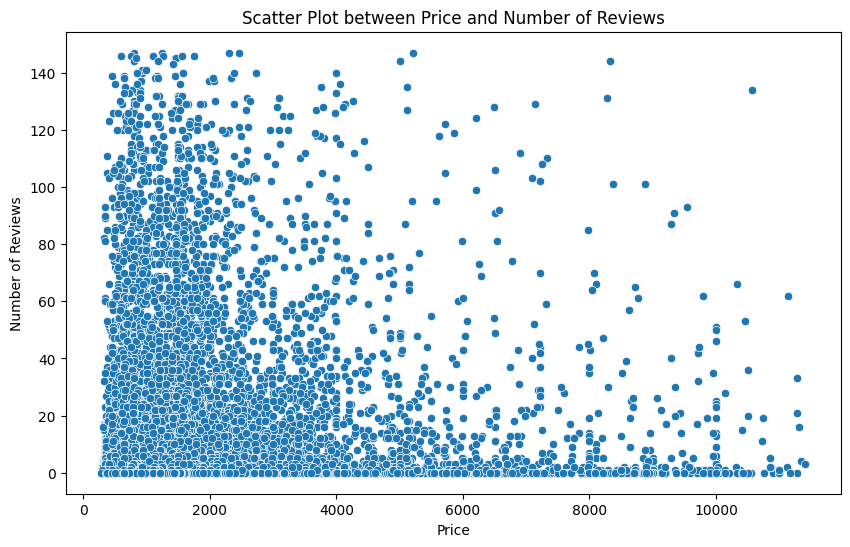

In [82]:
# Scatter plot antara 'price' dan 'number_of_reviews'
plt.figure(figsize=(10, 6))
sns.scatterplot(x='price', y='number_of_reviews', data=data)
plt.title('Scatter Plot between Price and Number of Reviews')
plt.xlabel('Price')
plt.ylabel('Number of Reviews')
plt.show()

Scatter plot ini menunjukkan hubungan antara price dan number of reviews yang diterima. Disini dapat dilihat apakah listing dengan price lebih tinggi cenderung mendapatkan lebih banyak atau lebih sedikit reviews. Ternyata, price yang cenderung lebih rendah lebih banyak mendapatkan reviews.

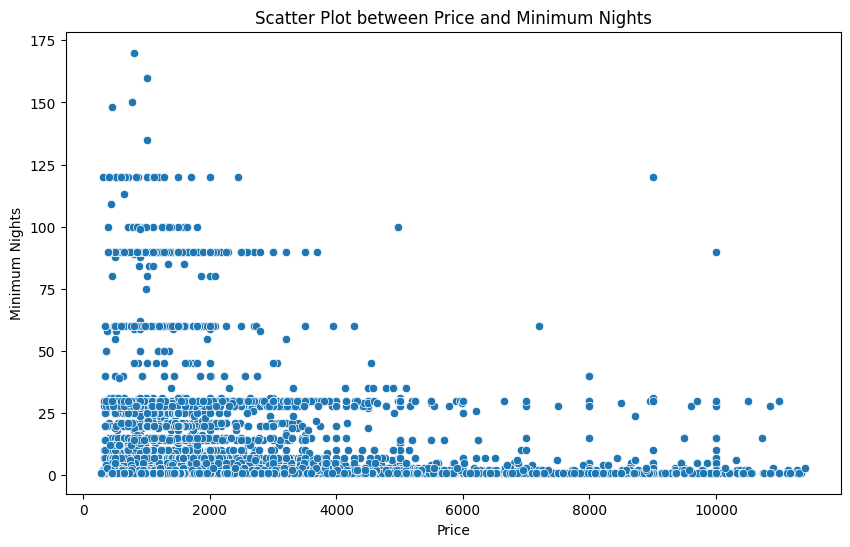

In [78]:
# Scatter plot antara 'price' dan 'minimum_nights'
plt.figure(figsize=(10, 6))
sns.scatterplot(x='price', y='minimum_nights', data=data)
plt.title('Scatter Plot between Price and Minimum Nights')
plt.xlabel('Price')
plt.ylabel('Minimum Nights')
plt.show()

Scatter plot ini menunjukkan hubungan antara price dan minimum nights yang diperlukan untuk memesan listing. Titik-titik naik atau turun secara konsisten menunjukkan bahwa ada hubungan antara harga dan jumlah malam minimum.

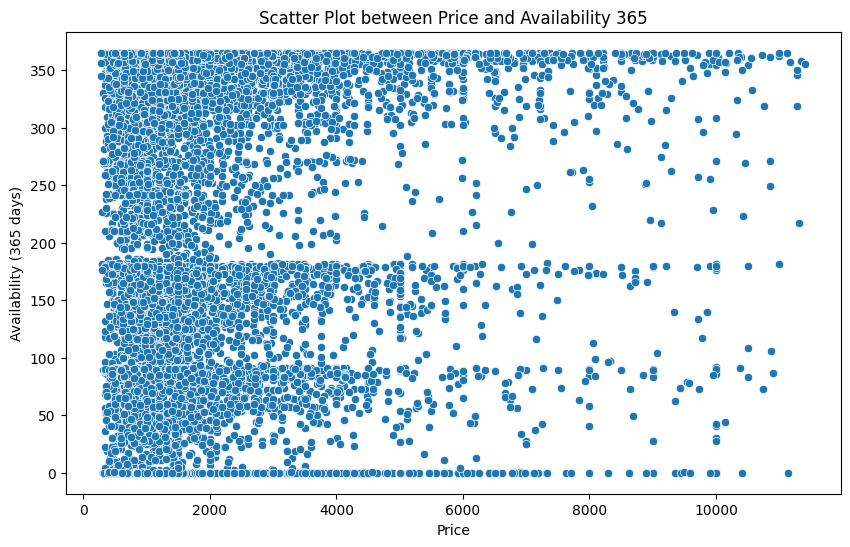

In [79]:
# Scatter plot antara 'price' dan 'availability_365'
plt.figure(figsize=(10, 6))
sns.scatterplot(x='price', y='availability_365', data=data)
plt.title('Scatter Plot between Price and Availability 365')
plt.xlabel('Price')
plt.ylabel('Availability (365 days)')
plt.show()

Scatter plot ini menunjukkan hubungan antara price dan availability selama 365 hari dalam setahun. Listing dengan harga lebih tinggi cenderung tersedia lebih sedikit hari yang menunjukkan korelasi negatif, mungkin karena listing mahal cenderung disewa untuk periode yang lebih singkat.

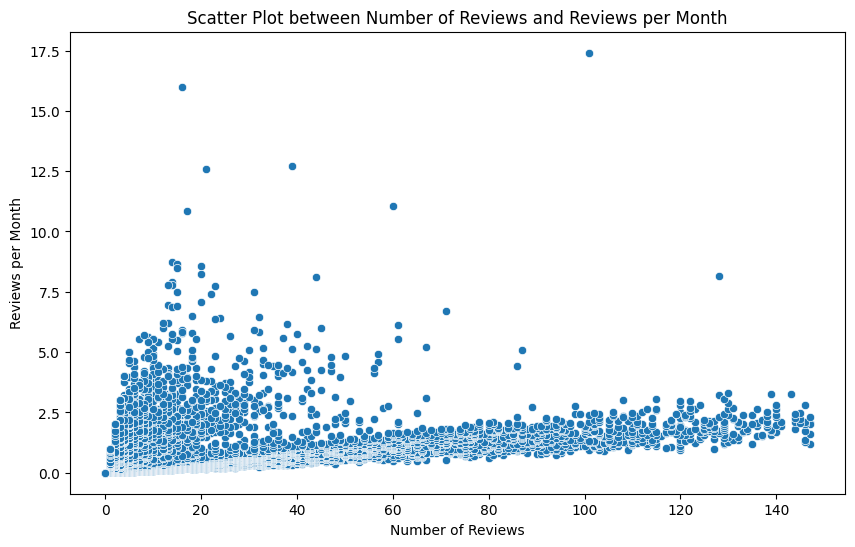

In [80]:
# Scatter plot antara 'number_of_reviews' dan 'reviews_per_month'
plt.figure(figsize=(10, 6))
sns.scatterplot(x='number_of_reviews', y='reviews_per_month', data=data)
plt.title('Scatter Plot between Number of Reviews and Reviews per Month')
plt.xlabel('Number of Reviews')
plt.ylabel('Reviews per Month')
plt.show()

Scatter plot ini menunjukkan hubungan antara jumlah reviews dan reviews per month untuk listing. Listing dengan jumlah review yang lebih tinggi cenderung memiliki rata-rata review per bulan yang lebih rendah menunjukkan korelasi negatif, dimana mungkin dikarenakan listing tersebut sudah ada sejak lama dan aktivitas ulasan menurun seiring waktu.